In [58]:
import pandas as pd
import numpy as np
import yfinance as yf
import pyfolio as pf
from itertools import combinations
import warnings
warnings.simplefilter('ignore')

# Tactical Asset Allocation Ensemble Portfolio

The Tactical Asset Allocation Ensemble (TAA) portfolio combines five distinct strategies, each with its own methodology for selecting and allocating assets. This diversified approach aims to leverage the strengths of each strategy while mitigating the risks associated with any single strategy. The five strategies included are:

1. **Enhanced Optimum3 Portfolio**
2. **Hybrid Asset Allocation (HAA)**
3. **Generalized Protective Momentum (GPM)**
4. **Kipnis Defensive Adaptive Asset Allocation (KDA)**
5. **Elastic Asset Allocation (EAA)**

## Strategy Overview and Mathematical Explanation

### Enhanced Optimum3 Portfolio
**Momentum Signal**
- **Calculation**: 6-month returns
- **Formula**:
  $
  \text{Momentum Score} = \left(\frac{p_0}{p_1} + \frac{p_0}{p_3} + \frac{p_0}{p_6}\right)/3 - 1
  $
  where $ p_0 $ is the latest price, $ p_1 $ is the price one month ago, $ p_3 $ is the price three months ago, and $ p_6 $ is the price six months ago.

**Crash Protection**
- If all bonds (IEF, TLT, TIP, BWX) have negative momentum, allocate to BIL.

**Volatility Targeting**
- **Target Volatility**: 10%
- **Formula**:
  $
  \text{Adjusted Allocation} = \text{Allocation} \times \frac{\text{Target Volatility}}{\text{Portfolio Volatility}}
  $

### Hybrid Asset Allocation (HAA)
**Momentum Signal**
- **Calculation**: Average of 1-month, 3-month, 6-month, and 12-month returns
- **Formula**:
  $
  \text{Momentum} = \frac{\left(R_{1m} + R_{3m} + R_{6m} + R_{12m}\right)}{4}
  $
  where $ R_{xm} $ represents x-month returns.

**Allocation**
- If TIP momentum is positive, allocate to the top 4 offensive assets based on momentum.
- If TIP momentum is negative, allocate to defensive assets (IEF or BIL).

### Generalized Protective Momentum (GPM)
**Momentum Signal**
- **Calculation**: Combines returns over 1, 3, 6, and 12 months
- **Formula**:
  $
  r_i = \frac{1}{4} \left( r_{i,1m} + r_{i,3m} + r_{i,6m} + r_{i,12m} \right)
  $

**Correlation Adjustment**
- **Calculation**: 12-month correlation with equal-weighted index
- **Formula**:
  $
  z_i = r_i \times (1 - c_i)
  $

**Crash Protection**
- Allocate to the crash protection asset with the highest adjusted momentum score if fewer than 6 assets have positive scores.

### Kipnis Defensive Adaptive Asset Allocation (KDA)
**Momentum Signal**
- **Calculation**: Combination of returns over different time frames (1, 3, 6, and 12 months)
- **Formula**:
  $
  \text{Momentum Score} = 12 \times \left(\frac{p_0}{p_1}\right) + 4 \times \left(\frac{p_0}{p_3}\right) + 2 \times \left(\frac{p_0}{p_6}\right) + \left(\frac{p_0}{p_{12}}\right) - 19
  $

**Allocation**
- Use a broad range of time frames for momentum calculation.
- Allocate to crash protection assets if the majority of assets have negative momentum.

### Elastic Asset Allocation (EAA)
**Momentum Signal**
- **Calculation**: Combines returns over different time frames
- **Formula**:
  $
  r_i = \frac{1}{4} \left( r_{i,1m} + r_{i,3m} + r_{i,6m} + r_{i,12m} \right)
  $

**Volatility and Correlation Adjustment**
- **Formula**:
  $
  z_i = \frac{(r_i)^{w_R} \times (1 - c_i)^{w_C}}{(v_i)^{w_V}}
  $
  where $ r_i $ is the return, $ c_i $ is the correlation, and $ v_i $ is the volatility.

**Allocation**
- Normalize adjusted momentum scores to determine final weights.

## Diversification Benefits of the TAA Ensemble Portfolio

The Tactical Asset Allocation Ensemble (TAA) portfolio benefits significantly from the diversification of momentum signals, asset universes, and allocation methodologies used in its constituent strategies. This diversification helps to smooth out returns, reduce volatility, and improve the risk-adjusted performance of the overall portfolio. Here’s why:

### Diversification of Momentum Signals

Each strategy in the TAA Ensemble employs different methods for calculating momentum, leveraging various look-back periods and computational techniques. This diversification in momentum signals provides several advantages:

1. **Timeframe Variety**: Different strategies use different timeframes to calculate momentum:
   - **Enhanced Optimum3** uses 6-month returns.
   - **Hybrid Asset Allocation** averages 1-month, 3-month, 6-month, and 12-month returns.
   - **Generalized Protective Momentum** combines 1, 3, 6, and 12-month returns.
   - **Kipnis Defensive Adaptive** uses a weighted combination of 1, 3, 6, and 12-month returns.
   - **Elastic Asset Allocation** uses a similar combination with added adjustments for volatility and correlation.
   
By incorporating signals from multiple timeframes, the portfolio can capture various market trends and cycles, reducing the risk of being overly exposed to any single market regime.

2. **Methodological Diversity**: The strategies use different mathematical formulations to calculate momentum:
   - **Relative Momentum**: Enhanced Optimum3 and Hybrid Asset Allocation focus on returns relative to other assets.
   - **Absolute Momentum**: Generalized Protective Momentum and Kipnis Defensive Adaptive use absolute momentum to ensure that only positively trending assets are selected.
   - **Risk-Adjusted Momentum**: Elastic Asset Allocation adjusts momentum scores by volatility and correlation to enhance risk-adjusted returns.

   This diversity in methodologies helps to mitigate the risk of any single momentum calculation method underperforming during certain market conditions.

### Diversification of Asset Universes

The asset universes covered by the strategies are broad and diverse, including equities, bonds, commodities, and real estate:
- **Equities**: SPY, QQQ, IWM, VGK, EWJ, EEM, SCZ
- **Bonds**: IEF, TLT, TIP, LQD, BWX
- **Commodities and Real Assets**: DBC, GLD, VNQ, REM, RWX

This wide range of asset classes ensures that the portfolio can adapt to various economic conditions, including growth, inflation, deflation, and recession.

### Concentration Risk Mitigation

Each strategy employs different rules for asset selection and allocation:
- **Enhanced Optimum3** and **Hybrid Asset Allocation** use crash protection mechanisms to shift to safer assets (e.g., BIL) during periods of negative momentum.
- **Generalized Protective Momentum** dynamically adjusts allocations based on momentum and correlation, focusing on assets with strong momentum and low correlation to the market.
- **Kipnis Defensive Adaptive** and **Elastic Asset Allocation** incorporate volatility targeting and correlation adjustments to optimize risk-adjusted returns.

By combining these strategies, the portfolio reduces the risk of over-concentration in any single asset class or market regime. The ensemble approach ensures that different strategies can offset each other's weaknesses, leading to a more stable and resilient portfolio.

### Summary

The TAA Ensemble portfolio's diversified approach to momentum signals, asset universes, and allocation methodologies provides a robust framework for capturing returns while managing risks. By leveraging the strengths of each individual strategy, the ensemble portfolio aims to deliver superior risk-adjusted performance across various market environments.









In [64]:
#Optimum 3
# Define the tickers for the strategy
tickers = ['SPY', 'QQQ', 'VNQ', 'REM', 'IEF', 'TLT', 'TIP', 'VGK', 'EWJ', 'SCZ', 'EEM', 'RWX', 'BWX', 'DBC', 'GLD', 'BIL']
bonds = ['IEF', 'TLT', 'TIP', 'BWX']
safe_asset = 'BIL'

# Download the data
start_date = '2007-06-01'
data = yf.download(tickers, start=start_date)['Adj Close']

# Calculate 6-month returns
monthly_data = data.resample('M').last()
six_month_returns = (monthly_data / monthly_data.shift(6) - 1).dropna()

# Function to calculate average correlation of a portfolio
def average_correlation(portfolio, data):
    return data[list(portfolio)].pct_change().corr().mean().mean()

# Function to calculate momentum score
def calculate_momentum_score(prices):
    p0 = prices.iloc[-1]
    p1 = prices.iloc[-2]
    p3 = prices.iloc[-4]
    p6 = prices.iloc[-7]
    momentum_score = (p0/p1 + p0/p3 + p0/p6)/3 - 1
    return momentum_score

# Function to calculate volatility
def calculate_volatility(returns, window=21):
    return returns.rolling(window).std().iloc[-1]

# Initialize allocations DataFrame
allocations = pd.DataFrame(index=six_month_returns.index, columns=tickers).fillna(0)

# Perform the Optimum3 strategy with crash protection and volatility targeting
for date in six_month_returns.index[6:]:
    # Calculate the 6-month returns for the assets
    asset_returns = six_month_returns.loc[date]
    
    # Select the top half with the highest 6-month returns
    top_half = asset_returns.nlargest(len(asset_returns) // 2).index.tolist()
    
    # Calculate correlations and select the 3 assets with the lowest average correlation
    best_portfolio = None
    best_correlation = float('inf')
    
    for portfolio in combinations(top_half, 3):
        corr = average_correlation(portfolio, data.loc[:date])
        if corr < best_correlation:
            best_correlation = corr
            best_portfolio = portfolio
    
    # Allocate 1/3 of the portfolio to each of the three selected assets
    if best_portfolio:
        for asset in best_portfolio:
            allocations.loc[date, asset] = 1 / 3
    
    # Crash protection mechanism
    # If all bonds are underperforming (negative momentum), allocate to BIL
    bond_momentum_scores = {bond: calculate_momentum_score(monthly_data.loc[:date, bond]) for bond in bonds}
    if all(score < 0 for score in bond_momentum_scores.values()):
        allocations.loc[date] = 0  # Reset allocations
        allocations.loc[date, safe_asset] = 1.0
    
    # Volatility targeting
    portfolio_volatility = calculate_volatility(data.pct_change().loc[:date, best_portfolio].mean(axis=1))
    target_volatility = 0.10  # Target volatility of 10%
    
    if portfolio_volatility > target_volatility:
        allocations.loc[date] *= target_volatility / portfolio_volatility

# Forward fill the allocations to apply the same allocation until the next rebalance
daily_allocations = allocations.resample('D').ffill().reindex(data.index, method='ffill').fillna(0)

# Calculate daily returns
daily_returns = data.pct_change().dropna()
portfolio_returns_optimum = (daily_returns * daily_allocations.shift(1)).sum(axis=1)





#Generalized Protective Momentum
risk_assets = ['SPY', 'QQQ', 'IWM', 'VGK', 'EWJ', 'EEM', 'VNQ', 'DBC', 'GLD', 'HYG', 'LQD', 'TLT', "IEF", "BIL"]
crash_protection_assets = ['IEF', 'BIL']
assets = risk_assets + crash_protection_assets

data = yf.download(assets, start='2007-06-01')['Adj Close']
monthly_prices = data.resample('BM').last()
returns = monthly_prices.pct_change()

# Calculate ri (average of 1, 3, 6, 12-month returns)
ri_1m = returns
ri_3m = returns.rolling(window=3).mean()
ri_6m = returns.rolling(window=6).mean()
ri_12m = returns.rolling(window=12).mean()
ri = (ri_1m + ri_3m + ri_6m + ri_12m) / 4

# Calculate equal-weighted return of the 12 risk assets
equal_weighted_return = returns[risk_assets].mean(axis=1)

# Calculate ci (12-month correlation with the equal-weighted return)
ci = pd.DataFrame(index=ri.index, columns=risk_assets)
for asset in risk_assets:
    ci[asset] = returns[asset].rolling(window=12).corr(equal_weighted_return)
    
# Calculate zi (zi = ri * (1 - ci))
zi = ri[risk_assets] * (1 - ci)
n = (zi[12:] > 0).sum(axis=1)

# Initialize the allocations DataFrame
allocations = pd.DataFrame(index=returns.index, columns=risk_assets + crash_protection_assets).fillna(0)

# Perform monthly rebalancing
for date in zi[12:].index:
    if n.loc[date] <= 6:
        # Allocate 100% to the crash protection asset with the highest zi
        if zi.loc[date, 'IEF'] > zi.loc[date, 'BIL']:
            allocations.loc[date, 'IEF'] = 1.0
        else:
            allocations.loc[date, 'BIL'] = 1.0
    else:
        # Calculate the CP % = (12 - n) / 6
        cp_percent = (12 - n.loc[date]) / 6
        if zi.loc[date, 'IEF'] > zi.loc[date, 'BIL']:
            allocations.loc[date, 'IEF'] = cp_percent
        else:
            allocations.loc[date, 'BIL'] = cp_percent
        
        # Allocate the remaining portfolio to the top 3 risk assets with the highest zi
        top_risk_assets = zi.loc[date].nlargest(3).index
        for asset in top_risk_assets:
            allocations.loc[date, asset] = (1 - cp_percent) / 3

# Forward fill allocations to daily frequency
daily_allocation_df = allocations.reindex(data.index, method='ffill')

# Calculate daily returns of the strategy
strategy_daily_returns_GPM = pd.Series(0, index=data.index)
for date, allocation in daily_allocation_df.iterrows():
    daily_returns = sum(data[asset].pct_change().loc[date] * weight for asset, weight in allocation.items() if weight > 0)
    strategy_daily_returns_GPM.loc[date] = daily_returns


    
    
    
#Hybrid Asset Allocation
asset_classes = ['SPY', 'IWM', 'EFA', 'EEM', 'VNQ', 'DBC', 'IEF', 'TLT', 'TIP', 'BIL']
data = yf.download(asset_classes, start='2007-06-01')['Adj Close']

def calculate_momentum(data, window):
    return data.pct_change(window).mean(axis=1)

momentum_1m = data.pct_change(21)
momentum_3m = data.pct_change(63)
momentum_6m = data.pct_change(126)
momentum_12m = data.pct_change(252)
momentum = (momentum_1m + momentum_3m + momentum_6m + momentum_12m) / 4

portfolio = pd.DataFrame(index=data.index, columns=asset_classes, data=0.0)

for date in momentum.index[1:]:
    if date not in data.index:
        continue

    tips_momentum = momentum.at[date, 'TIP']
    
    if tips_momentum > 0:
        offensive_assets = ['SPY', 'IWM', 'EFA', 'EEM', 'VNQ', 'DBC', 'IEF', 'TLT']
        offensive_momentum = momentum.loc[date, offensive_assets]
        top_assets = offensive_momentum.nlargest(4).index
        
        for asset in top_assets:
            if momentum.at[date, asset] > 0:
                portfolio.loc[date, asset] = 0.25
            else:
                defensive_asset = 'IEF' if momentum.at[date, 'IEF'] > momentum.at[date, 'BIL'] else 'BIL'
                portfolio.loc[date, defensive_asset] += 0.25
    else:
        defensive_asset = 'IEF' if momentum.at[date, 'IEF'] > momentum.at[date, 'BIL'] else 'BIL'
        portfolio.loc[date, defensive_asset] = 1.0

portfolio = portfolio.resample('B').ffill().reindex(data.index, method='ffill').fillna(0)

portfolio_returns_hybrid = (portfolio.shift(1) * data.pct_change()).sum(axis=1)





#Kipnis Defensive Asset Allocation
investment_universe = ['SPY', 'VGK', 'EWJ', 'EEM', 'VNQ', 'RWX', 'IEF', 'TLT', 'DBC', 'GLD']
crash_protection_assets = ['IEF', 'BIL']
canary_assets = ['EEM', 'AGG']
assets = investment_universe + crash_protection_assets + canary_assets

# Download data
data = yf.download(assets, start='2007-06-01')['Adj Close']
monthly_prices = data.resample('BM').last()
returns = monthly_prices.pct_change()

# Function to calculate momentum score
def calculate_momentum_score(prices):
    p0 = prices.iloc[-1]
    p1 = prices.iloc[-2]
    p3 = prices.iloc[-4]
    p6 = prices.iloc[-7]
    p12 = prices.iloc[-13]
    momentum_score = (12 * (p0 / p1) + 4 * (p0 / p3) + 2 * (p0 / p6) + (p0 / p12)) - 19
    return momentum_score

# Initialize the allocations DataFrame
allocations = pd.DataFrame(index=returns.index, columns=investment_universe + crash_protection_assets).fillna(0)

# Perform monthly rebalancing
for date in returns.index[13:]:
    momentum_scores_risk = monthly_prices[investment_universe].loc[:date].apply(calculate_momentum_score, axis=0)
    momentum_scores_canary = monthly_prices[canary_assets].loc[:date].apply(calculate_momentum_score, axis=0)
    
    # Check canary momentum scores
    if (momentum_scores_canary <= 0).all():
        if momentum_scores_canary['EEM'] > 0:
            allocations.loc[date, 'IEF'] = 1.0
        else:
            allocations.loc[date, 'BIL'] = 1.0
    elif (momentum_scores_canary > 0).all():
        top_assets = momentum_scores_risk[momentum_scores_risk > 0].nlargest(5).index
        allocations.loc[date, top_assets] = 1 / len(top_assets)
    else:
        if momentum_scores_canary['EEM'] > 0:
            allocations.loc[date, 'IEF'] = 0.5
        else:
            allocations.loc[date, 'BIL'] = 0.5
        top_assets = momentum_scores_risk[momentum_scores_risk > 0].nlargest(5).index
        allocations.loc[date, top_assets] = 0.1
        
# Forward fill allocations to daily frequency
daily_allocation_df = allocations.reindex(data.index, method='ffill')

# Calculate daily returns of the strategy
strategy_daily_returns_defensive = pd.Series(0, index=data.index)
for date, allocation in daily_allocation_df.iterrows():
    daily_returns = sum(data[asset].pct_change().loc[date] * weight for asset, weight in allocation.items() if weight > 0)
    strategy_daily_returns_defensive.loc[date] = daily_returns

    
    
    


#Elastic Asset Allocation
# Define assets
assets = ['SPY', 'QQQ', 'IWM', 'VGK', 'EWJ', 'EEM', 'VNQ', 'DBC', 'GLD', 'HYG', 'LQD', 'TLT', "BIL", "IEF"]

# Download data
data = yf.download(assets, start='2007-06-01')['Adj Close']
monthly_prices = data.resample('BM').last()
returns = monthly_prices.pct_change()

# Calculate return, volatility, and correlation
ri_1m = returns
ri_3m = returns.rolling(window=3).mean()
ri_6m = returns.rolling(window=6).mean()
ri_12m = returns.rolling(window=12).mean()
ri = (ri_1m + ri_3m + ri_6m + ri_12m) / 4

vi = returns.rolling(window=12).std()
equal_weighted_index = returns.mean(axis=1)
ci = pd.DataFrame(index=ri.index, columns=risk_assets)
for asset in risk_assets:
    ci[asset] = returns[asset].rolling(window=12).corr(equal_weighted_index)

# Elasticities
wR, wV, wC = 1, 0, 1  # Adjust these values based on optimization

# Generalized momentum score
zi = (ri ** wR) * ((1 - ci) ** wC) / (vi ** wV)
zi = zi.clip(lower=0)  # Set negative scores to zero

# Normalize weights
wi = zi.div(zi.sum(axis=1), axis=0)

# Combine weights
allocations = pd.concat([wi], axis=1)

# Forward fill allocations to daily frequency
daily_allocation_df = allocations.reindex(data.index, method='ffill')

# Calculate daily returns of the strategy
strategy_daily_returns_elastic = pd.Series(0, index=data.index)
for date, allocation in daily_allocation_df.iterrows():
    daily_returns = sum(data[asset].pct_change().loc[date] * weight for asset, weight in allocation.items() if weight > 0)
    strategy_daily_returns_elastic.loc[date] = daily_returns




[*********************100%%**********************]  16 of 16 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  12 of 12 completed
[*********************100%%**********************]  14 of 14 completed


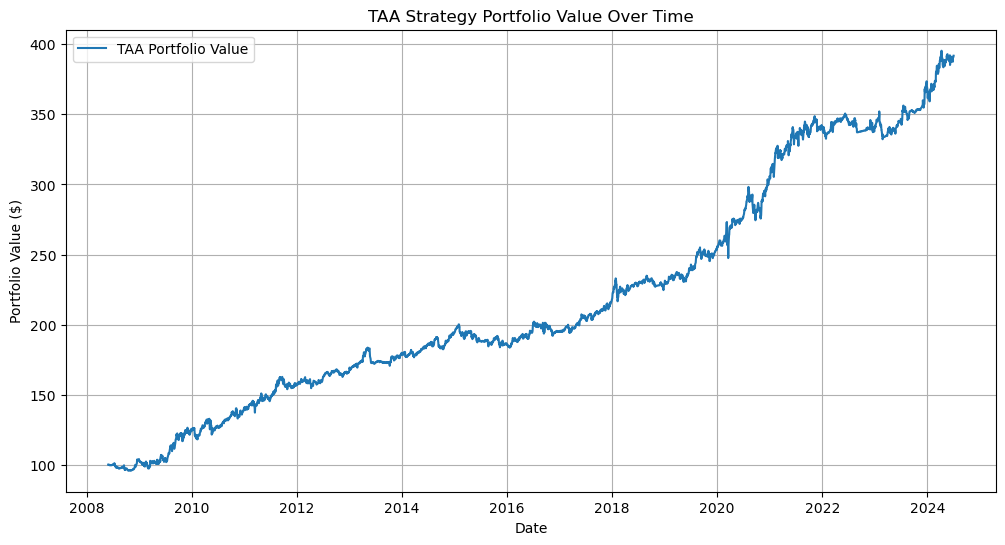

In [67]:
strategy_daily_returns = (portfolio_returns_optimum * 0.3) + (strategy_daily_returns_GPM * 0.3) + (portfolio_returns_hybrid * 0.1333) + (strategy_daily_returns_defensive * 0.1333) + (strategy_daily_returns_elastic * 0.1333) 

# Define initial investment
initial_investment = 100

# Calculate the cumulative returns of the strategy
strategy_cumulative_returns = (1 + strategy_daily_returns).cumprod()

# Calculate the portfolio value over time
portfolio_value = strategy_cumulative_returns * initial_investment

# Plot the portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value[251:], label='TAA Portfolio Value')
plt.title('TAA Strategy Portfolio Value Over Time')
plt.xlabel('Date')

plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

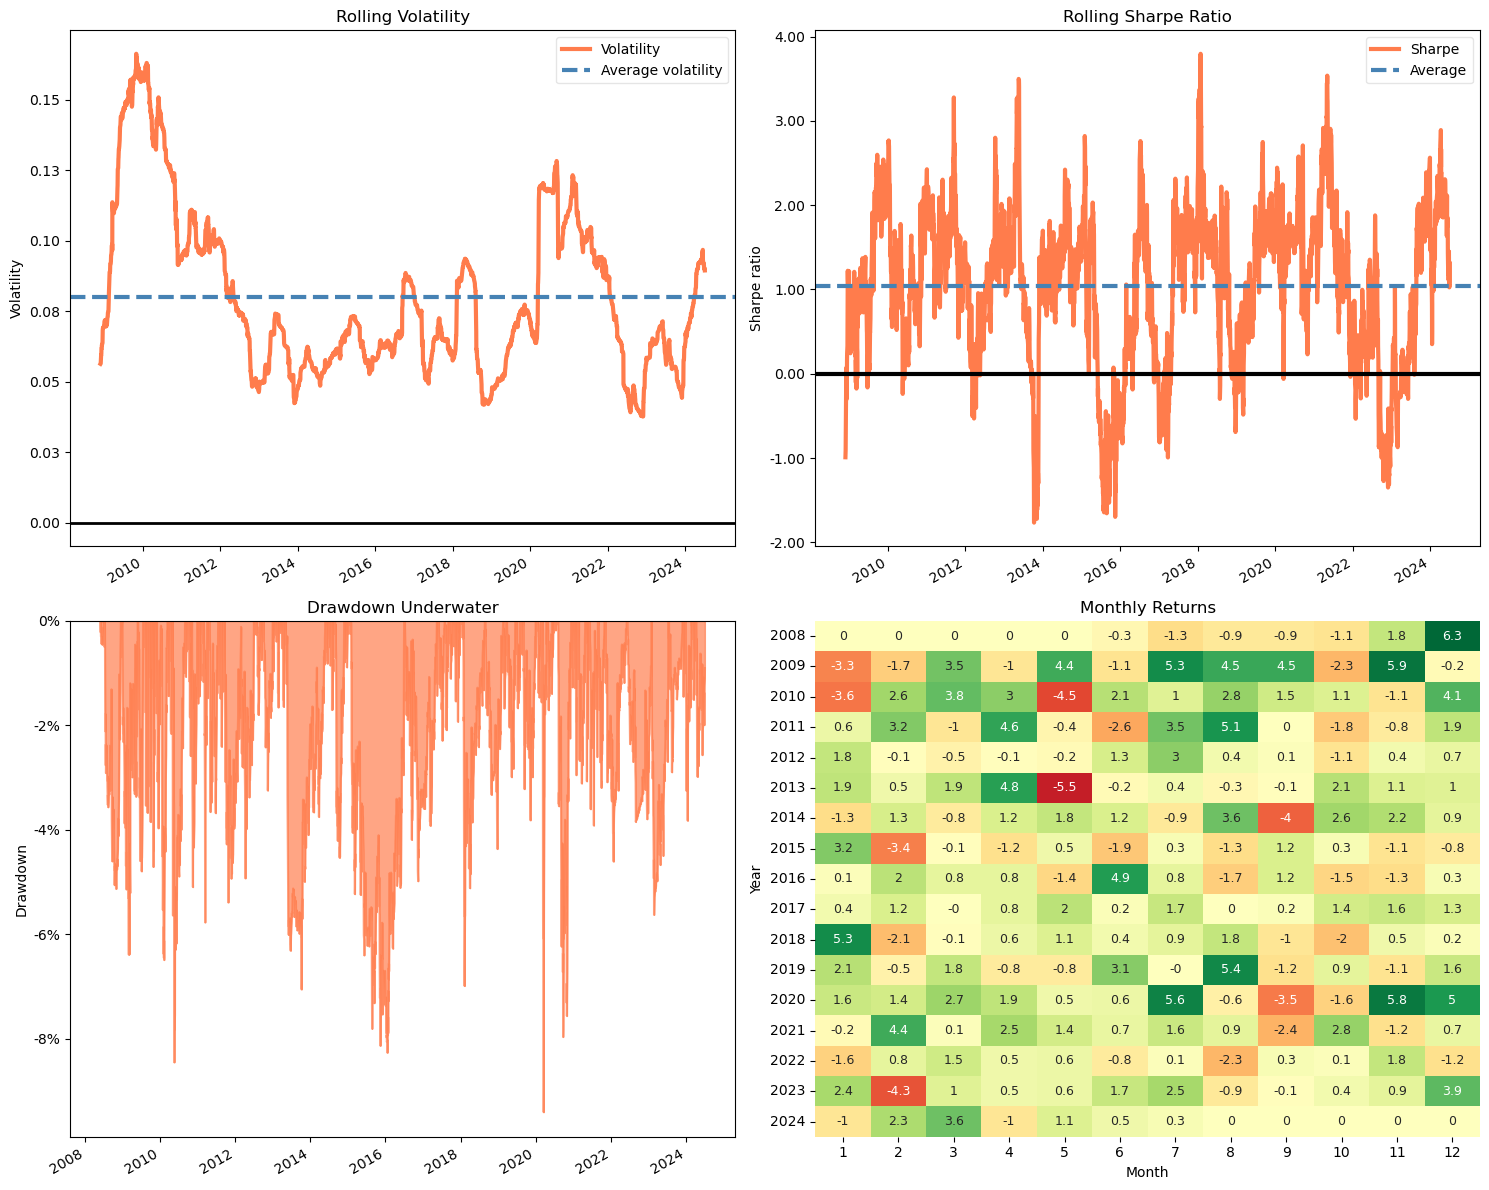

Annual return          0.088398
Cumulative returns     2.900171
Annual volatility      0.084624
Sharpe ratio           1.043468
Calmar ratio           0.939750
Stability              0.966228
Max drawdown          -0.094065
Omega ratio            1.209313
Sortino ratio          1.491746
Skew                  -0.240158
Kurtosis               4.718287
Tail ratio             1.019797
Daily value at risk   -0.010311
dtype: float64


In [68]:
strategy_returns = portfolio_value[251:].pct_change().dropna()
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

plt.sca(axs[0, 0])
pf.plot_rolling_volatility(strategy_returns, ax=axs[0, 0])
axs[0, 0].set_title('Rolling Volatility')

plt.sca(axs[0, 1])
pf.plot_rolling_sharpe(strategy_returns, ax=axs[0, 1])
axs[0, 1].set_title('Rolling Sharpe Ratio')

plt.sca(axs[1, 0])
pf.plot_drawdown_underwater(strategy_returns, ax=axs[1, 0])
axs[1, 0].set_title('Drawdown Underwater')

plt.sca(axs[1, 1])
pf.plot_monthly_returns_heatmap(strategy_returns)
axs[1, 1].set_title('Monthly Returns')

plt.tight_layout()
plt.show()

perf_stats = pf.timeseries.perf_stats(strategy_returns)
print(perf_stats)

<AxesSubplot:title={'center':'Annual returns'}, xlabel='Returns', ylabel='Year'>

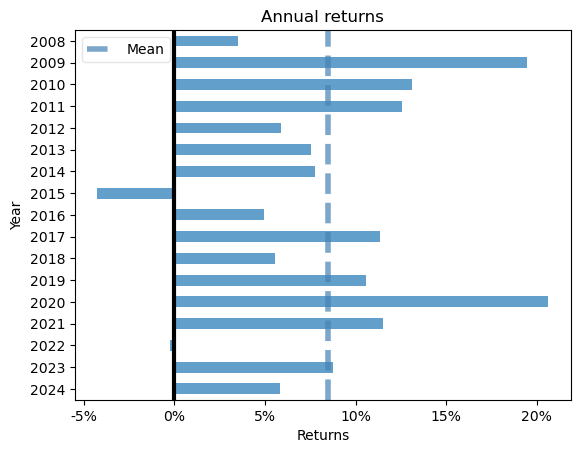

In [69]:
pf.plot_annual_returns(strategy_returns)

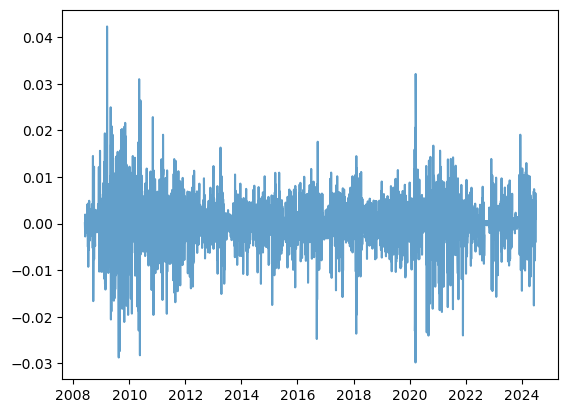